## __Data Selection__
You need to get the data that you will use for the index. This could be done by using<br>
publicly available data sets or survey.<br>
(10 Marks)

In [3372]:
import pandas as pd

file_path = 'Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(file_path)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3373]:
# Drop Person ID column
data.drop('Person ID', axis=1, inplace=True)
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3374]:
# Print column names
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [3375]:
# Print shape of data
data.shape

(374, 12)

In [3376]:
# Describe the data
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [3377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


## __Imputation of Missing Data__
If your data is not complete you will need to infer values to complete the dataset.<br>
(10 Marks)

In [3378]:
# Check for missing values
missing_data = data.isnull().sum()
missing_data

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [3379]:
# Impute missing values with 'None' for people with no sleep disorder
data.fillna({'Sleep Disorder': 'None'}, inplace=True)
print(data.isnull().sum())

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [3380]:
# Print unique values in Sleep Disorder column
data['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

__One Hot Encode__

In [3381]:
def manual_onehot_encode(column):
    unique_values = column.unique()
    value_to_int = {value: idx for idx, value in enumerate(unique_values)}
    encoded_column = column.map(value_to_int)
    return encoded_column, value_to_int

categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
encoded_data = data.copy()
mappings = {}

for col in categorical_columns:
    encoded_data[col], mappings[col] = manual_onehot_encode(data[col])

encoded_data.head(), mappings


(   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
 0       0   27           0             6.1                 6   
 1       0   28           1             6.2                 6   
 2       0   28           1             6.2                 6   
 3       0   28           2             5.9                 4   
 4       0   28           2             5.9                 4   
 
    Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
 0                       42             6             0               0   
 1                       60             8             1               1   
 2                       60             8             1               1   
 3                       30             8             2               2   
 4                       30             8             2               2   
 
    Heart Rate  Daily Steps  Sleep Disorder  
 0          77         4200               0  
 1          75        10000               0  
 2          75    

In [3382]:
# Drop the original categorical columns
data.drop(categorical_columns, axis=1, inplace=True)
data.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,27,6.1,6,42,6,77,4200
1,28,6.2,6,60,8,75,10000
2,28,6.2,6,60,8,75,10000
3,28,5.9,4,30,8,85,3000
4,28,5.9,4,30,8,85,3000


In [3383]:
# Reset the index of the encoded data
encoded_data.reset_index(drop=True, inplace=True)
encoded_data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,0,6.1,6,42,6,0,0,77,4200,0
1,0,28,1,6.2,6,60,8,1,1,75,10000,0
2,0,28,1,6.2,6,60,8,1,1,75,10000,0
3,0,28,2,5.9,4,30,8,2,2,85,3000,1
4,0,28,2,5.9,4,30,8,2,2,85,3000,1


## __Multivariate Analysis__
Analyse and report on the structure of the data. Decide what are the most important<br>
variables and what should be excluded from the index.<br>
(10 Marks)


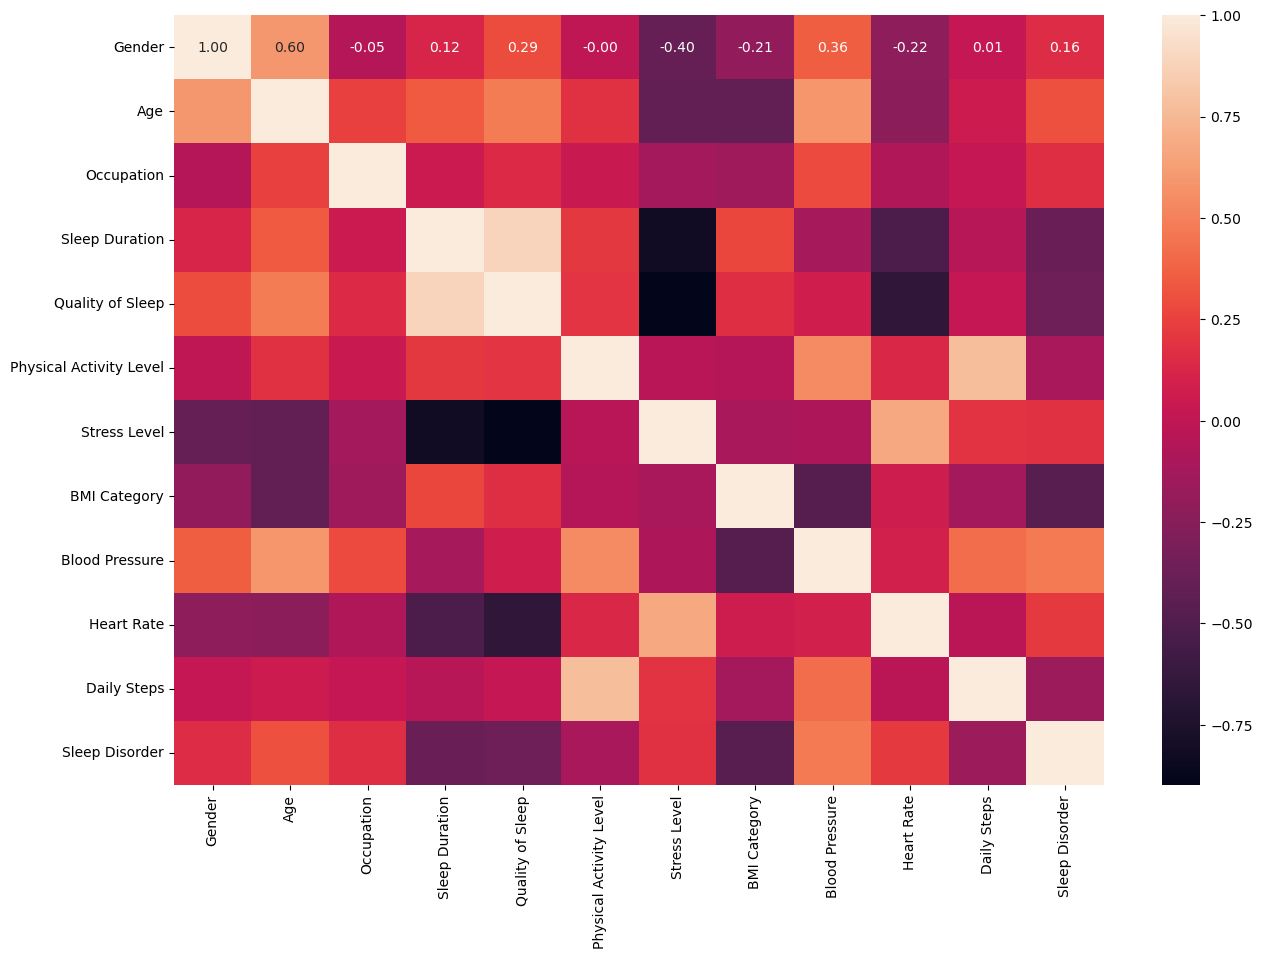

In [3384]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = encoded_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()


#### __Linear Scatter Plots__<br>
Dependent variable "Quality of Sleep" vs Independent variables

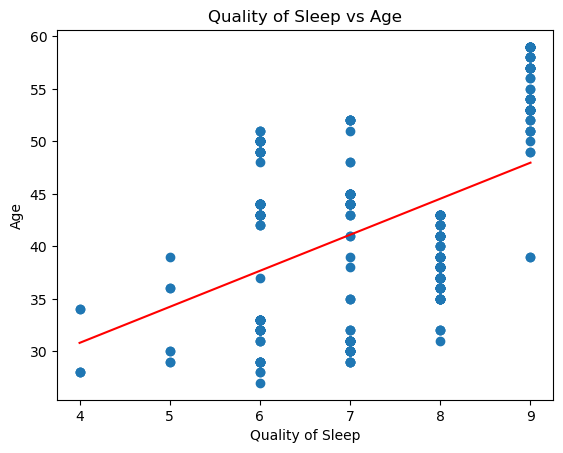

In [3385]:
import numpy as np

# Linear Scatter plot Quality of Sleep vs Age
plt.title("Quality of Sleep vs Age")
plt.xlabel("Quality of Sleep")
plt.ylabel("Age")
plt.scatter(encoded_data['Quality of Sleep'], encoded_data['Age'])
plt.plot(np.unique(encoded_data['Quality of Sleep']), np.poly1d(np.polyfit(encoded_data['Quality of Sleep'], encoded_data['Age'], 1))(np.unique(encoded_data['Quality of Sleep'])), color='red')

__Slight correlation between Quality of Sleep and Age. Suggesting that as age increases the Quality of Sleep might as well.__

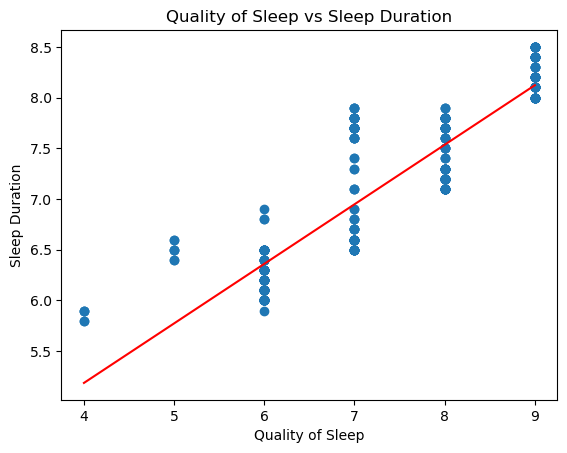

In [3386]:
# Linear Scatter plot Quality of Sleep vs Sleep Duration
plt.title("Quality of Sleep vs Sleep Duration")
plt.xlabel("Quality of Sleep")
plt.ylabel("Sleep Duration")
plt.scatter(encoded_data['Quality of Sleep'], encoded_data['Sleep Duration'])
plt.plot(np.unique(encoded_data['Quality of Sleep']), np.poly1d(np.polyfit(encoded_data['Quality of Sleep'], encoded_data['Sleep Duration'], 1))(np.unique(encoded_data['Quality of Sleep'])), color='red')

__High correlation between Quality of Sleep and Sleep Duration. As Sleep Duration increases so does Quality of Sleep.__

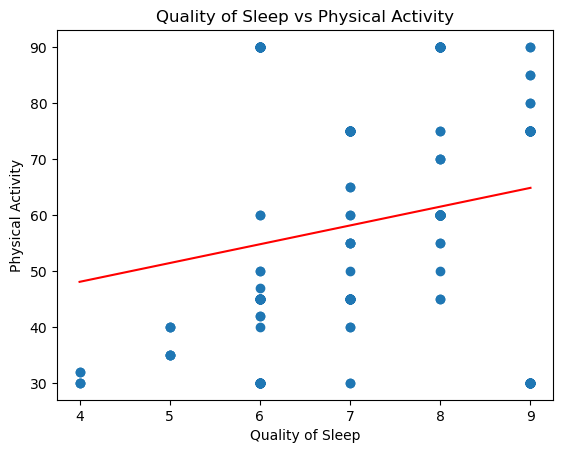

In [3387]:
# Linear Scatter plot Quality of Sleep vs Physical Activity
plt.title("Quality of Sleep vs Physical Activity")
plt.xlabel("Quality of Sleep")
plt.ylabel("Physical Activity")
plt.scatter(encoded_data['Quality of Sleep'], encoded_data['Physical Activity Level'])
plt.plot(np.unique(encoded_data['Quality of Sleep']), np.poly1d(np.polyfit(encoded_data['Quality of Sleep'], encoded_data['Physical Activity Level'], 1))(np.unique(encoded_data['Quality of Sleep'])), color='red')

__Slight correlation between Quality of Sleep and Physical Activity Level. With more Physical Activity it may increase Sleep Quality__

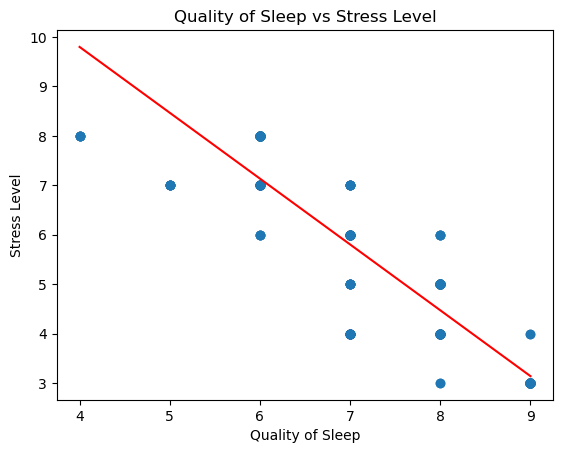

In [3388]:
# Linear Scatter plot Quality of Sleep vs Stress Level
plt.title("Quality of Sleep vs Stress Level")
plt.xlabel("Quality of Sleep")
plt.ylabel("Stress Level")
plt.scatter(encoded_data['Quality of Sleep'], encoded_data['Stress Level'])
plt.plot(np.unique(encoded_data['Quality of Sleep']), np.poly1d(np.polyfit(encoded_data['Quality of Sleep'], encoded_data['Stress Level'], 1))(np.unique(encoded_data['Quality of Sleep'])), color='red')

__Negative correlation between Quality of Sleep and Stress Level. This suggests that as Stress Levels decrease the Quality of Sleep increases__

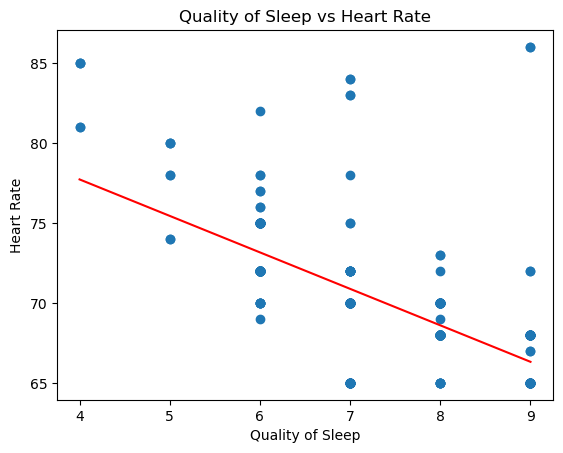

In [3389]:
# Linear Scatter plot Quality of Sleep vs Heart Rate
plt.title("Quality of Sleep vs Heart Rate")
plt.xlabel("Quality of Sleep")
plt.ylabel("Heart Rate")
plt.scatter(encoded_data['Quality of Sleep'], encoded_data['Heart Rate'])
plt.plot(np.unique(encoded_data['Quality of Sleep']), np.poly1d(np.polyfit(encoded_data['Quality of Sleep'], encoded_data['Heart Rate'], 1))(np.unique(encoded_data['Quality of Sleep'])), color='red')

__Negative correlation between Quality of Sleep and Heart Rate. This suggests that as Heart Rate decreases the Quality of Sleep increases__

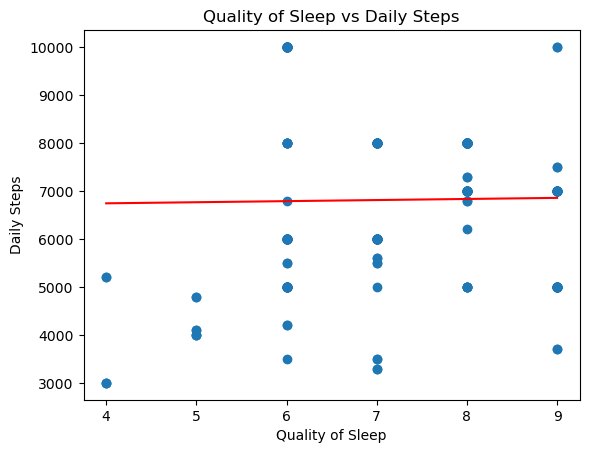

In [3390]:
# Linear Scatter plot Quality of Sleep vs Daily Steps
plt.title("Quality of Sleep vs Daily Steps")
plt.xlabel("Quality of Sleep")
plt.ylabel("Daily Steps")
plt.scatter(encoded_data['Quality of Sleep'], encoded_data['Daily Steps'])
plt.plot(np.unique(encoded_data['Quality of Sleep']), np.poly1d(np.polyfit(encoded_data['Quality of Sleep'], encoded_data['Daily Steps'], 1))(np.unique(encoded_data['Quality of Sleep'])), color='red')

__No correlation between Quality of Sleep and Daily Steps.__

#### __Independent vs Independent Variables__

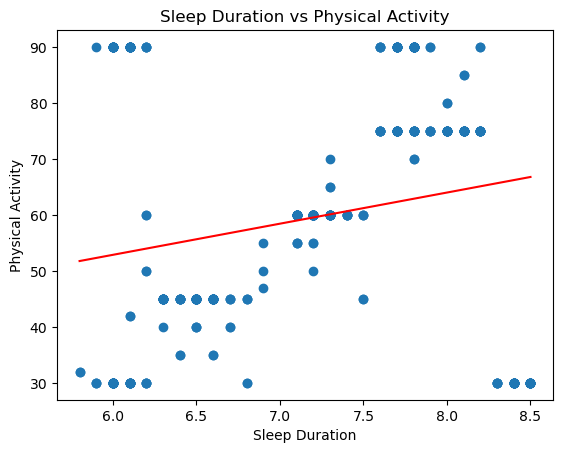

In [3391]:
# Linear Scatter plot Sleep Duration vs Physical Activity
plt.title("Sleep Duration vs Physical Activity")
plt.xlabel("Sleep Duration")
plt.ylabel("Physical Activity")
plt.scatter(encoded_data['Sleep Duration'], encoded_data['Physical Activity Level'])
plt.plot(np.unique(encoded_data['Sleep Duration']), np.poly1d(np.polyfit(encoded_data['Sleep Duration'], encoded_data['Physical Activity Level'], 1))(np.unique(encoded_data['Sleep Duration'])), color='red')

__Slight Positive Correlation between Sleep Duration and Physical Activity__

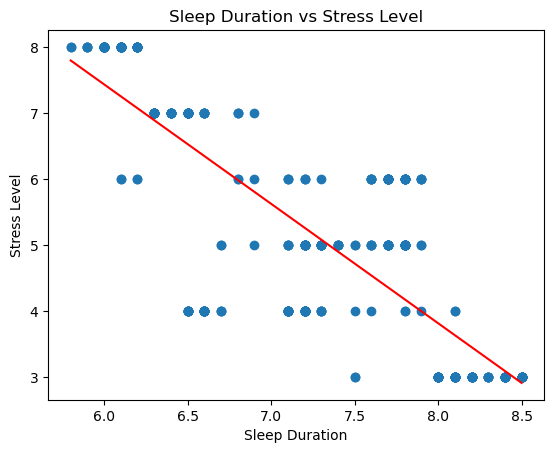

In [3392]:
# Linear Scatter plot Sleep Duration vs Stress Level
plt.title("Sleep Duration vs Stress Level")
plt.xlabel("Sleep Duration")
plt.ylabel("Stress Level")
plt.scatter(encoded_data['Sleep Duration'], encoded_data['Stress Level'])
plt.plot(np.unique(encoded_data['Sleep Duration']), np.poly1d(np.polyfit(encoded_data['Sleep Duration'], encoded_data['Stress Level'], 1))(np.unique(encoded_data['Sleep Duration'])), color='red')

__Strong Negative Correlation between Sleep Duration and Stress Level__

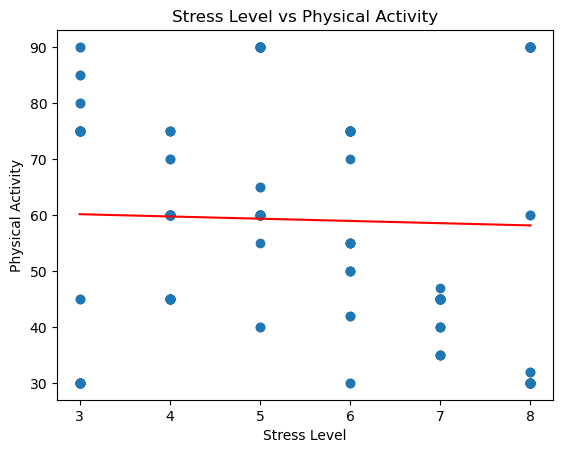

In [3393]:
# Linear Scatter plot Stress Level vs Physical Activity
plt.title("Stress Level vs Physical Activity")
plt.xlabel("Stress Level")
plt.ylabel("Physical Activity")
plt.scatter(encoded_data['Stress Level'], encoded_data['Physical Activity Level'])
plt.plot(np.unique(encoded_data['Stress Level']), np.poly1d(np.polyfit(encoded_data['Stress Level'], encoded_data['Physical Activity Level'], 1))(np.unique(encoded_data['Stress Level'])), color='red')

__No Correlation between Stress Level and Physical Activity__

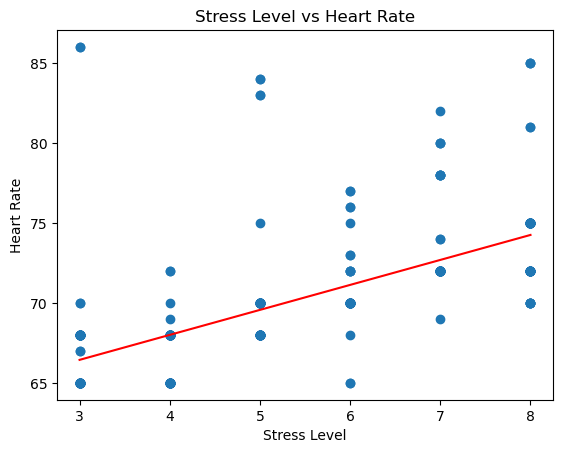

In [3394]:
# Linear Scatter plot Stress Level vs Heart Rate
plt.title("Stress Level vs Heart Rate")
plt.xlabel("Stress Level")
plt.ylabel("Heart Rate")
plt.scatter(encoded_data['Stress Level'], encoded_data['Heart Rate'])
plt.plot(np.unique(encoded_data['Stress Level']), np.poly1d(np.polyfit(encoded_data['Stress Level'], encoded_data['Heart Rate'], 1))(np.unique(encoded_data['Stress Level'])), color='red')

__Slight Positive Correlation between Stress Level and Heart Rate__

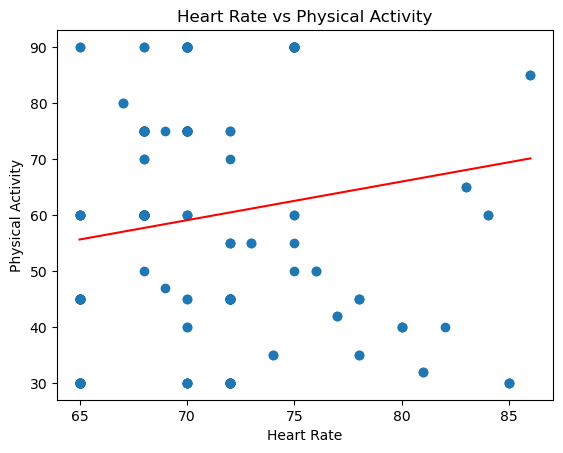

In [3395]:
# Linear Scatter plot Heart Rate vs Physical Activity
plt.title("Heart Rate vs Physical Activity")
plt.xlabel("Heart Rate")
plt.ylabel("Physical Activity")
plt.scatter(encoded_data['Heart Rate'], encoded_data['Physical Activity Level'])
plt.plot(np.unique(encoded_data['Heart Rate']), np.poly1d(np.polyfit(encoded_data['Heart Rate'], encoded_data['Physical Activity Level'], 1))(np.unique(encoded_data['Heart Rate'])), color='red')

__Slight Positive Correlation between Heart Rate and Physical Activity__

#### __Pearson Correlation__

* 1 indicates a perfect positive linear relationship,
* -1 indicates a perfect negative linear relationship,
* 0 indicates no linear relationship.

In [3396]:
from scipy.stats import pearsonr

In [3397]:
corr = pearsonr(encoded_data['Quality of Sleep'], encoded_data['Age'])
print(corr)

PearsonRResult(statistic=0.47373387616198803, pvalue=2.553119182303198e-22)


__Small Correlation__<br>
Age = 0.47

In [3398]:
corr = pearsonr(encoded_data['Quality of Sleep'], encoded_data['Sleep Duration'])
print(corr)

PearsonRResult(statistic=0.8832130004106167, pvalue=2.170991770869847e-124)


__Very Strong Positive Correlation__<br>
Sleep Duration = 0.88

In [3399]:
corr = pearsonr(encoded_data['Quality of Sleep'], encoded_data['Physical Activity Level'])
print(corr)

PearsonRResult(statistic=0.19289645493975288, pvalue=0.00017454895247839258)


__Weak Positive Correlation__<br>
Physical Activity Level = 0.19

In [3400]:
corr = pearsonr(encoded_data['Quality of Sleep'], encoded_data['Stress Level'])
print(corr)

PearsonRResult(statistic=-0.898752031004042, pvalue=2.88012424094114e-135)


__Strong Negative Correlation__<br>
Stress Level = -0.89

In [3401]:
corr = pearsonr(encoded_data['Quality of Sleep'], encoded_data['Heart Rate'])
print(corr)

PearsonRResult(statistic=-0.6598647331480074, pvalue=4.131998623368065e-48)


__Strong Postive Correlation__<br>
Heart Rate = 0.66

In [3402]:
corr = pearsonr(encoded_data['Quality of Sleep'], encoded_data['Daily Steps'])
print(corr)

PearsonRResult(statistic=0.01679141492471662, pvalue=0.7461906652961153)


__No Correlation__<br>
Daily Steps = 0.02

In [3403]:
# Drop Daily Steps column
encoded_data.drop('Daily Steps', axis=1, inplace=True)

In [3404]:
corr = pearsonr(encoded_data['Sleep Duration'], encoded_data['Physical Activity Level'])
print(corr)

PearsonRResult(statistic=0.21236031472575928, pvalue=3.4666184358491374e-05)


In [3405]:
corr = pearsonr(encoded_data['Sleep Duration'], encoded_data['Stress Level'])
print(corr)

PearsonRResult(statistic=-0.811023027894046, pvalue=1.2378076181506544e-88)


In [3406]:
corr = pearsonr(encoded_data['Stress Level'], encoded_data['Physical Activity Level'])
print(corr)

PearsonRResult(statistic=-0.034134463516742895, pvalue=0.5104666785066971)


In [3407]:
corr = pearsonr(encoded_data['Stress Level'], encoded_data['Heart Rate'])
print(corr)

PearsonRResult(statistic=0.6700264629986925, pvalue=4.492926517154705e-50)


In [3408]:
corr = pearsonr(encoded_data['Heart Rate'], encoded_data['Physical Activity Level'])
print(corr)

PearsonRResult(statistic=0.136970983213632, pvalue=0.007988901083709513)


In [3409]:
import statsmodels.api as sm

model = sm.OLS(data['Quality of Sleep'], sm.add_constant(data[['Sleep Duration']]))
result = model.fit()
print(result.summary())
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1319.
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.17e-124
Time:                        21:46:03   Log-Likelihood:                -314.22
No. Observations:                 374   AIC:                             632.4
Df Residuals:                     372   BIC:                             640.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.1634      0.262     -8.

In [3410]:
model = sm.OLS(data['Quality of Sleep'], sm.add_constant(data[['Stress Level']]))
result = model.fit()
print(result.summary())
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1563.
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.88e-135
Time:                        21:46:03   Log-Likelihood:                -289.06
No. Observations:                 374   AIC:                             582.1
Df Residuals:                     372   BIC:                             590.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.5774      0.087    121.678   

In [3411]:
model = sm.OLS(data['Quality of Sleep'], sm.add_constant(data[['Physical Activity Level']]))
result = model.fit()
print(result.summary())
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     14.38
Date:                Sun, 05 May 2024   Prob (F-statistic):           0.000175
Time:                        21:46:03   Log-Likelihood:                -590.33
No. Observations:                 374   AIC:                             1185.
Df Residuals:                     372   BIC:                             1193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [3412]:
model = sm.OLS(data['Quality of Sleep'], sm.add_constant(data[['Age']]))
result = model.fit()
print(result.summary())
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     107.6
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.55e-22
Time:                        21:46:03   Log-Likelihood:                -549.89
No. Observations:                 374   AIC:                             1104.
Df Residuals:                     372   BIC:                             1112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5549      0.271     16.785      0.0

In [3413]:
model = sm.OLS(data['Quality of Sleep'], sm.add_constant(data[['Heart Rate']]))
result = model.fit()
print(result.summary())
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     286.9
Date:                Sun, 05 May 2024   Prob (F-statistic):           4.13e-48
Time:                        21:46:03   Log-Likelihood:                -490.52
No. Observations:                 374   AIC:                             985.0
Df Residuals:                     372   BIC:                             992.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7131      0.792     26.136      0.0

In [3414]:
model = sm.OLS(encoded_data['Quality of Sleep'], sm.add_constant(encoded_data[['Sleep Duration', 'Stress Level', 'Physical Activity Level', 'Age', 'Heart Rate', 'Sleep Disorder', 'BMI Category', 'Blood Pressure', 'Occupation', 'Gender']]))
result = model.fit()
print(result.summary())
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     530.3
Date:                Sun, 05 May 2024   Prob (F-statistic):          9.30e-210
Time:                        21:46:03   Log-Likelihood:                -83.577
No. Observations:                 374   AIC:                             189.2
Df Residuals:                     363   BIC:                             232.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### __PCA Analysis__

In [3415]:
# New data frame
df = pd.DataFrame(encoded_data, columns=encoded_data.columns)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,0,27,0,6.1,6,42,6,0,0,77,0
1,0,28,1,6.2,6,60,8,1,1,75,0
2,0,28,1,6.2,6,60,8,1,1,75,0
3,0,28,2,5.9,4,30,8,2,2,85,1
4,0,28,2,5.9,4,30,8,2,2,85,1


In [3416]:
df.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.494652,42.184492,4.614973,7.132086,7.312834,59.171123,5.385027,0.743316,11.628342,70.165775,0.620321
std,0.500641,8.673133,2.560033,0.795657,1.196956,20.830804,1.774526,0.763368,7.651130,4.135676,0.805620
min,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,0.000000,65.000000,0.000000
25%,0.000000,35.250000,3.000000,6.400000,6.000000,45.000000,4.000000,0.000000,3.000000,68.000000,0.000000
50%,0.000000,43.000000,4.000000,7.200000,7.000000,60.000000,5.000000,1.000000,14.000000,70.000000,0.000000
75%,1.000000,50.000000,6.000000,7.800000,8.000000,75.000000,7.000000,1.000000,19.000000,72.000000,1.000000
max,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,3.000000,24.000000,86.000000,2.000000


In [3417]:
# Split the data into features and target
X = df
y = df['Quality of Sleep']

In [3418]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)
X_scaled

array([[-0.9893614 , -1.75309569, -1.80511544, ..., -1.52185625,
         1.6547187 , -0.77102372],
       [-0.9893614 , -1.63764266, -1.41397224, ..., -1.39098151,
         1.17047394, -0.77102372],
       [-0.9893614 , -1.63764266, -1.41397224, ..., -1.39098151,
         1.17047394, -0.77102372],
       ...,
       [ 1.010753  ,  1.94140144, -0.24054261, ...,  1.35738799,
        -0.52438269,  0.47191969],
       [ 1.010753  ,  1.94140144, -0.24054261, ...,  1.35738799,
        -0.52438269,  0.47191969],
       [ 1.010753  ,  1.94140144, -0.24054261, ...,  1.35738799,
        -0.52438269,  0.47191969]])

In [3419]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [3420]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

In [3421]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape


(374, 9)

In [3422]:
X_pca

array([[ 3.00258657,  1.50970368, -0.55166481, ..., -0.85114849,
        -1.23208816,  1.09212154],
       [ 3.11946623,  1.76639001,  0.42226376, ..., -0.27968992,
        -0.19330188, -0.02379353],
       [ 3.11946623,  1.76639001,  0.42226376, ..., -0.27968992,
        -0.19330188, -0.02379353],
       ...,
       [-3.05401256, -1.88178215,  0.23636779, ..., -0.44566484,
         0.05708765,  0.24405736],
       [-3.05401256, -1.88178215,  0.23636779, ..., -0.44566484,
         0.05708765,  0.24405736],
       [-3.05401256, -1.88178215,  0.23636779, ..., -0.44566484,
         0.05708765,  0.24405736]])

In [3423]:
pca.explained_variance_ratio_

array([0.3419214 , 0.25039039, 0.12112249, 0.0948255 , 0.06316246,
       0.04726672, 0.03725331, 0.02008639, 0.01601722])

In [3424]:
pca.n_components_

9

In [3425]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.92

In [3426]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
per_var

array([34.2, 25. , 12.1,  9.5,  6.3,  4.7,  3.7])

In [3427]:
X_pca

array([[ 3.00258657,  1.50970368, -0.55166481, ..., -1.00956442,
         0.03676784, -0.85114849],
       [ 3.11946623,  1.76639001,  0.42226376, ..., -0.49917523,
        -0.17977559, -0.27968992],
       [ 3.11946623,  1.76639001,  0.42226376, ..., -0.49917523,
        -0.17977559, -0.27968992],
       ...,
       [-3.05401256, -1.88178215,  0.23636779, ..., -0.27065375,
         0.51702059, -0.44566484],
       [-3.05401256, -1.88178215,  0.23636779, ..., -0.27065375,
         0.51702059, -0.44566484],
       [-3.05401256, -1.88178215,  0.23636779, ..., -0.27065375,
         0.51702059, -0.44566484]])

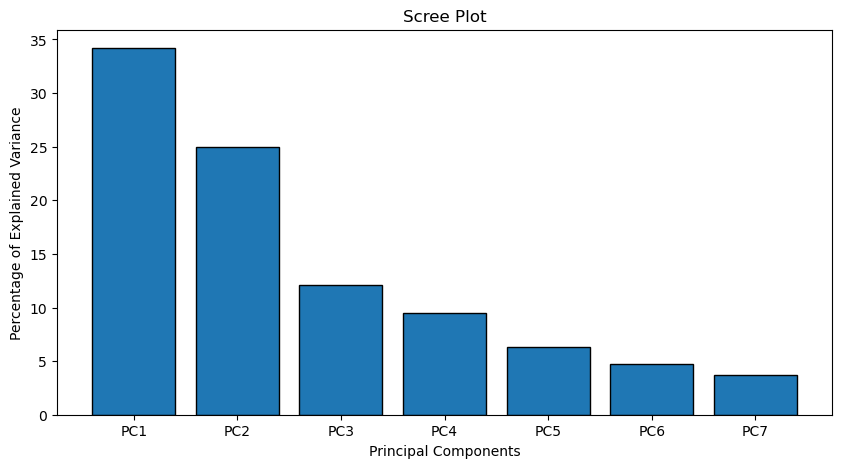

In [3428]:
# Scree Plot
plt.figure(figsize=(10, 5))
labels=['PC'+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels, edgecolor='black')
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title('Scree Plot')
plt.show()


In [3429]:
# Loading Scores
loading_scores = pd.Series(pca.components_[0], index=df.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_features = sorted_loading_scores[0:10].index.values
top_10_features

array(['Quality of Sleep', 'Stress Level', 'Sleep Duration', 'Heart Rate',
       'Age', 'Gender', 'Sleep Disorder', 'Blood Pressure',
       'Physical Activity Level', 'Occupation'], dtype=object)

In [3430]:
# Create a DataFrame of the top 10 features
top_10_features_df = df[top_10_features]
top_10_features_df.head()

,Quality of Sleep,Stress Level,Sleep Duration,Heart Rate,Age,Gender,Sleep Disorder,Blood Pressure,Physical Activity Level,Occupation
0,6,6,6.1,77,27,0,0,0,42,0
1,6,8,6.2,75,28,0,0,1,60,1
2,6,8,6.2,75,28,0,0,1,60,1
3,4,8,5.9,85,28,0,1,2,30,2
4,4,8,5.9,85,28,0,1,2,30,2


#### __Clustering__

As the dataset is small we will use Hierarchical Clustering

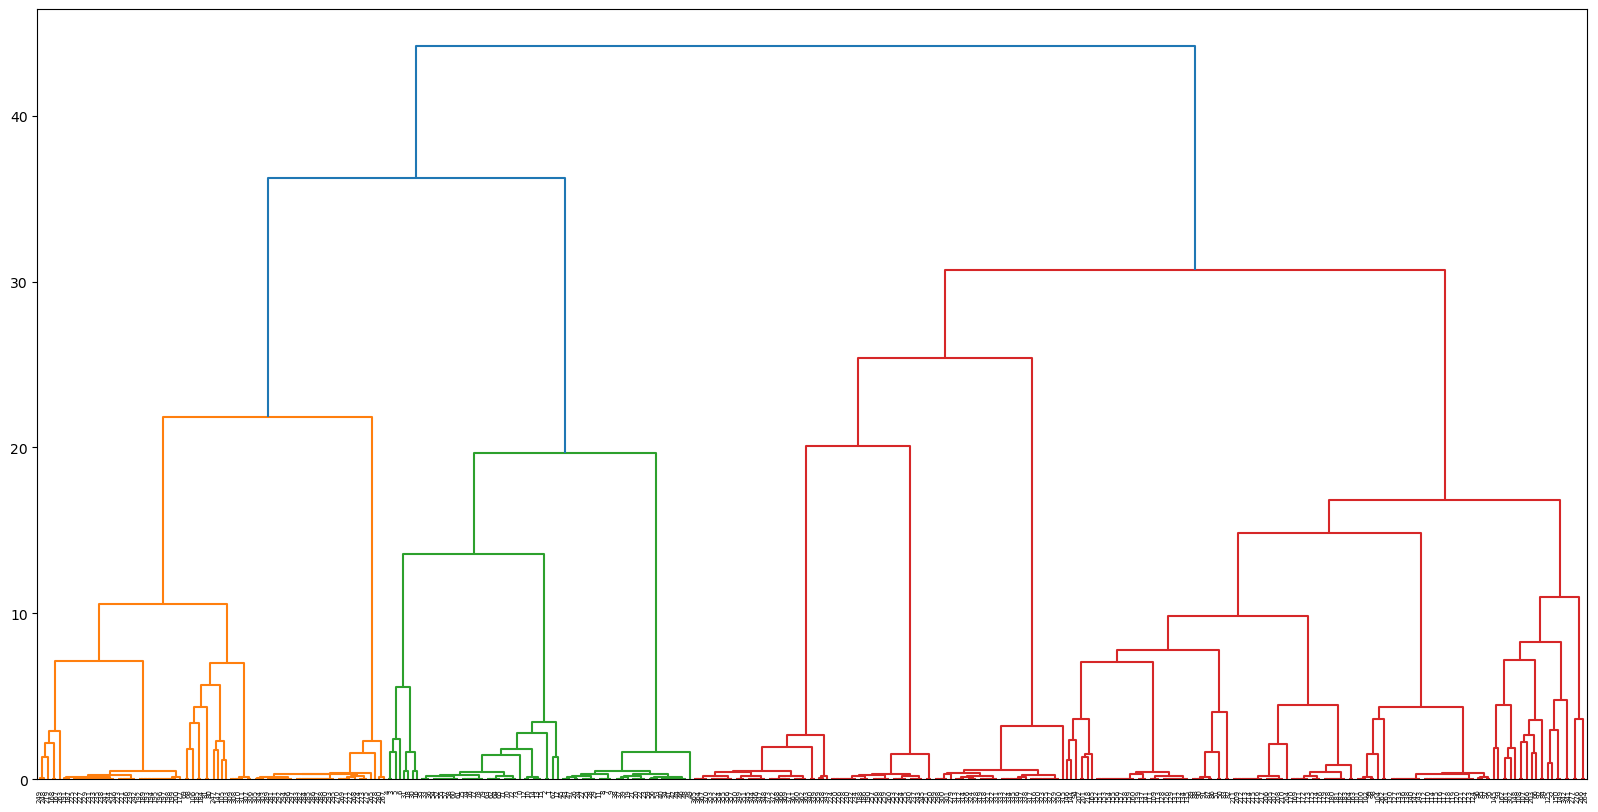

In [3431]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20, 10))
linked = linkage(X_pca, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

## __Normalisation__
In order to compare variables you will need to normalise them. Choose an appropriate<br>
normalisation.<br>
(10 Marks)


In [3432]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


## __Weighting and Aggregation__
Combine indicators into sub-indicators and a final composite index.<br>
(10 Marks)


In [3433]:
# Sleep Duration Sub-Index
X_scaled['Sleep Duration Sub-Index'] = (X_scaled['Sleep Duration'] - X_scaled['Sleep Duration'].min()) / (X_scaled['Sleep Duration'].max() - X_scaled['Sleep Duration'].min())

In [3434]:
# Sleep Disorder Sub-Index
X_scaled['Sleep Disorder Sub-Index'] = (X_scaled['Sleep Disorder'] - X_scaled['Sleep Disorder'].min()) / (X_scaled['Sleep Disorder'].max() - X_scaled['Sleep Disorder'].min())

In [3435]:
# Stress Level Sub-Index
X_scaled['Stress Sub-Index'] = X_scaled['Stress Level'].apply(
    lambda x: 100 - (x - 1) * 100 / 9 
)

In [3436]:
# Heart Rate Sub-Index
X_scaled['Heart Rate Sub-Index'] = X_scaled['Heart Rate'].apply(
    lambda x: 100 - (x - 60) * 100 / (100 - 60)
)

In [3437]:
# Weights based on the correlation matrix
weights = {
    'Sleep Duration Sub-Index': 0.25,
    'Sleep Disorder Sub-Index': 0.25,
    'Stress Sub-Index': 0.25,
    'Heart Rate Sub-Index': 0.25,
}
X_scaled['Composite Index'] = sum(X_scaled[col] * weight for col, weight in weights.items())

In [3438]:
# Show the calculated columns and the composite index
X_scaled[['Sleep Duration Sub-Index', 'Stress Sub-Index', 'Sleep Disorder Sub-Index', 'Heart Rate Sub-Index', 'Composite Index']].head()

,Sleep Duration Sub-Index,Stress Sub-Index,Sleep Disorder Sub-Index,Heart Rate Sub-Index,Composite Index
0,0.111111,104.444444,0.0,248.571429,88.281746
1,0.148148,100.000000,0.0,248.809524,87.239418
2,0.148148,100.000000,0.0,248.809524,87.239418
3,0.037037,100.000000,0.5,247.619048,87.039021
4,0.037037,100.000000,0.5,247.619048,87.039021


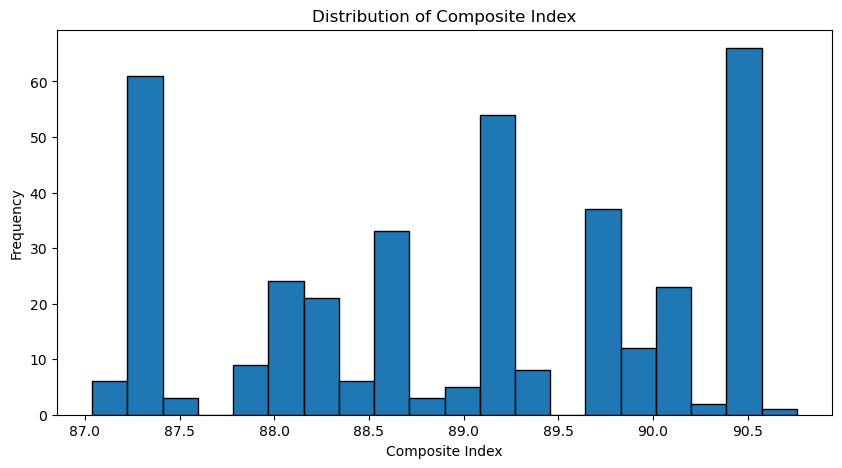

In [3439]:
# Visualize the distribution of the Composite Index
plt.figure(figsize=(10, 5))
plt.hist(X_scaled['Composite Index'], bins=20, edgecolor='black')
plt.xlabel('Composite Index')
plt.ylabel('Frequency')
plt.title('Distribution of Composite Index')
plt.show()

Text(0.5, 1.0, 'Distribution of Heart Rate Sub-Index')

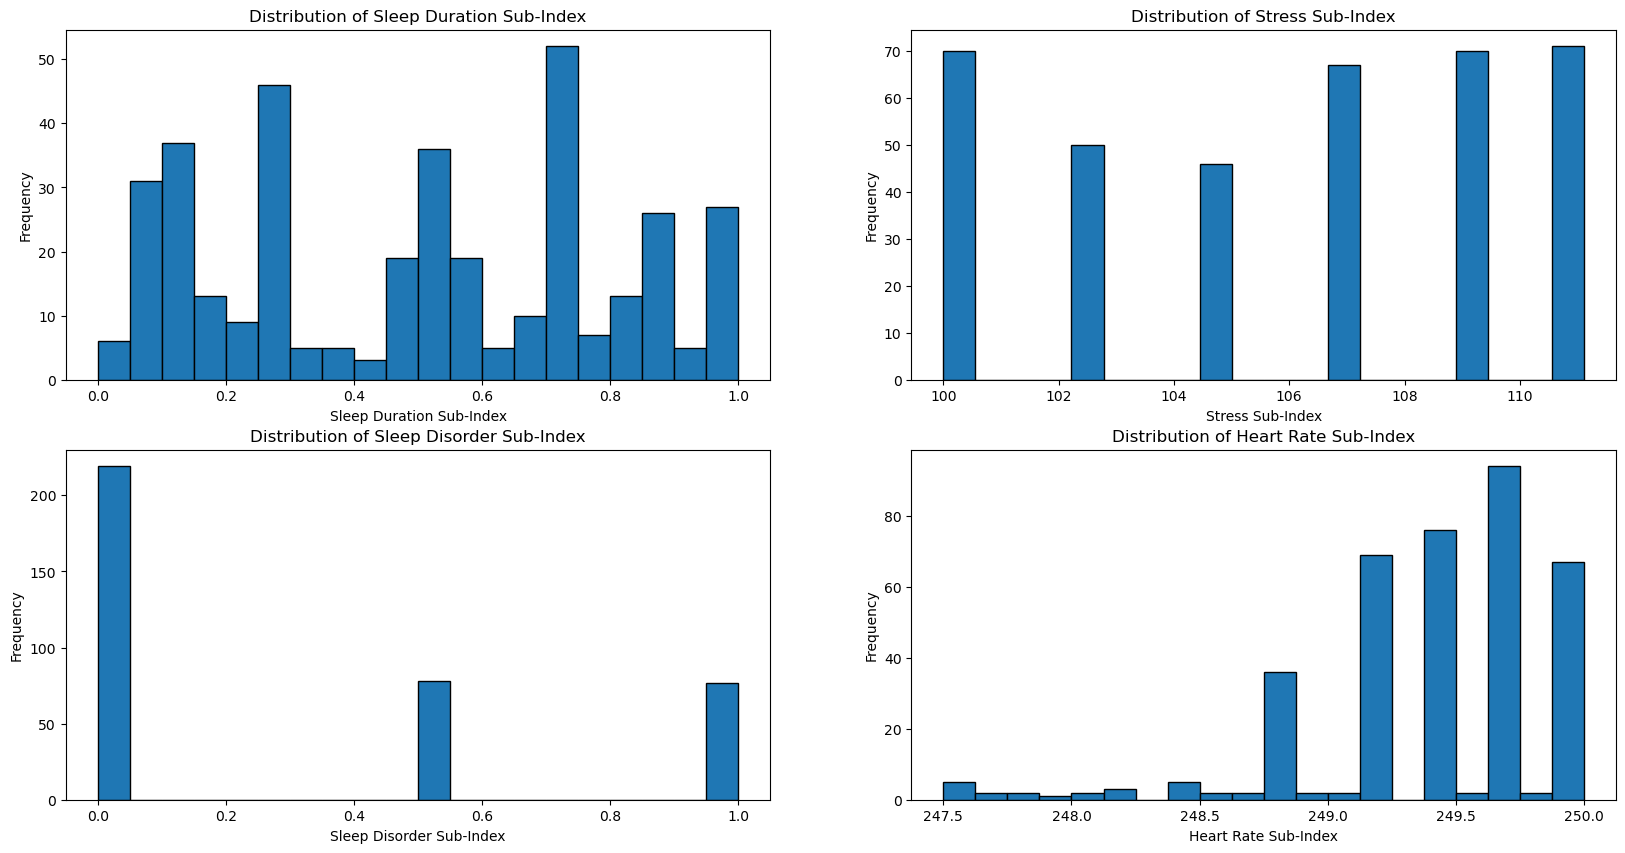

In [3440]:
# Histogram of each sub-index
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.hist(X_scaled['Sleep Duration Sub-Index'], bins=20, edgecolor='black')
plt.xlabel('Sleep Duration Sub-Index')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Duration Sub-Index')

plt.subplot(2, 2, 2)
plt.hist(X_scaled['Stress Sub-Index'], bins=20, edgecolor='black')
plt.xlabel('Stress Sub-Index')
plt.ylabel('Frequency')
plt.title('Distribution of Stress Sub-Index')

plt.subplot(2, 2, 3)
plt.hist(X_scaled['Sleep Disorder Sub-Index'], bins=20, edgecolor='black')
plt.xlabel('Sleep Disorder Sub-Index')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Disorder Sub-Index')

plt.subplot(2, 2, 4)
plt.hist(X_scaled['Heart Rate Sub-Index'], bins=20, edgecolor='black')
plt.xlabel('Heart Rate Sub-Index')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Rate Sub-Index')

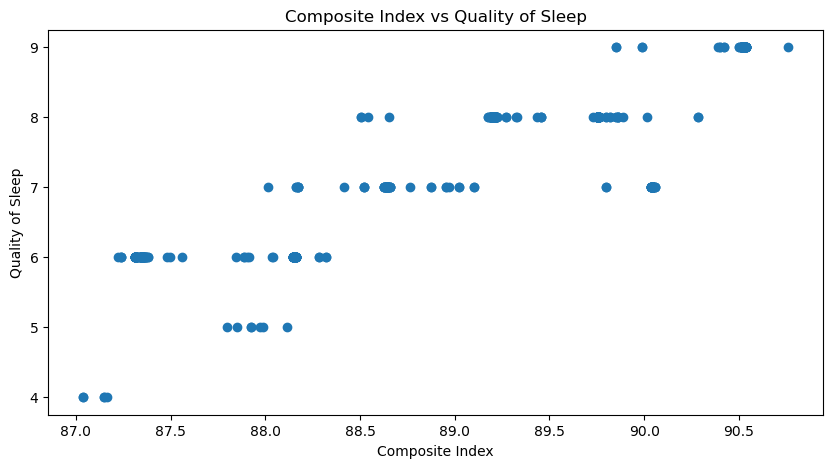

In [3441]:
# Scatter plot of Composite Index vs Quality of Sleep
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled['Composite Index'], df['Quality of Sleep'])
plt.xlabel('Composite Index')
plt.ylabel('Quality of Sleep')
plt.title('Composite Index vs Quality of Sleep')
plt.show()